In [968]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков

In [969]:
%matplotlib inline

In [970]:
# БДЗ 1.X

In [971]:
plasmaPage = pd.read_excel("src/data_matstat_K5.xls", sheet_name="C - plasma")

In [972]:
plC8 = plasmaPage.C8
plC10 = plasmaPage.C10
plC13 = plasmaPage.C13

print("Mean: ", plC8.mean(), plC10.mean(), plC13.mean())
print("Var: ", plC8.var(), plC10.var(), plC13.var())
print("Std: ", plC8.std(), plC10.std(), plC13.std())
print("Skew: ", plC8.skew(), plC10.skew(), plC13.skew())
print("Kurtosis: ", plC8.kurtosis(), plC10.kurtosis(), plC13.kurtosis())

Mean:  12.788571428571428 242.4606349206349 189.8920634920635
Var:  28.410951774340305 17421.786152461835 33489.2940450915
Std:  5.3301924706656045 131.9916139474847 183.00080340012582
Skew:  1.1529333799213661 1.4800546899219231 3.564154569285295
Kurtosis:  2.4835205022589943 3.4125850399648407 17.20900809044128


In [973]:
k = math.floor(1 + math.log(315, 2))
h = (plC8.max() - plC8.min()) / k

k, h

(9, 3.744444444444444)

In [974]:
pd.cut(plC8, k).value_counts(sort=False).values

array([37, 81, 95, 60, 24, 10,  4,  1,  3])

In [975]:
pd.cut(plC8, bins=k).value_counts(sort=False, normalize = True).values

array([0.11746032, 0.25714286, 0.3015873 , 0.19047619, 0.07619048,
       0.03174603, 0.01269841, 0.0031746 , 0.00952381])

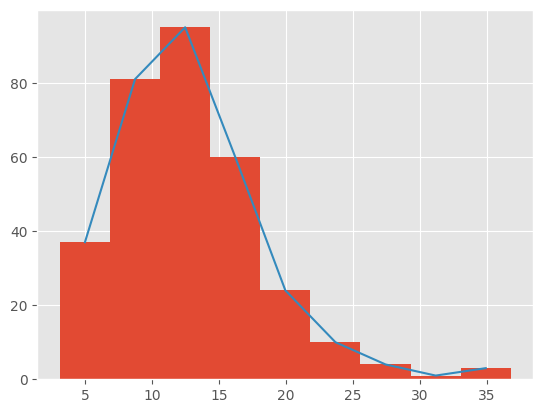

In [976]:
count,division = np.histogram(plC8, bins=k)
ar = []
for i in range(len(division)-1):
  ar.append(((division[i + 1] - division[i]) / 2) + division[i])

plC8.hist(bins=k, density=False)
plt.plot(ar, count)

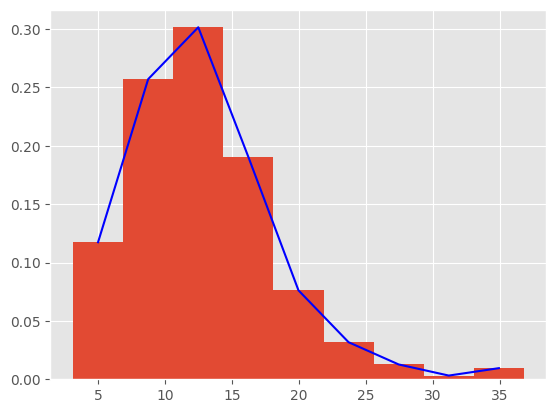

In [977]:
freqC8Rel = pd.cut(plC8, bins=k).value_counts(sort=False, normalize = True).values
plt.bar(ar, freqC8Rel, width = h)
plt.plot(ar, freqC8Rel, color="blue")

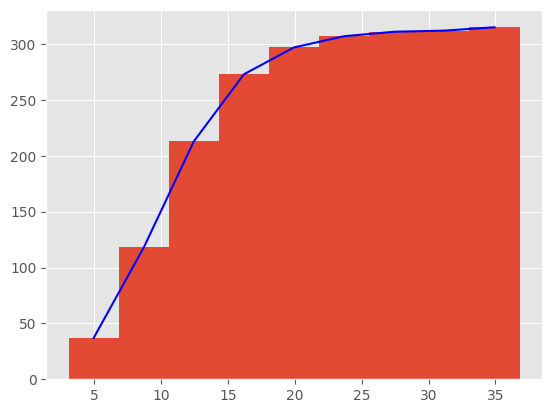

In [978]:
freqC8sum = pd.cut(plC8, bins=k).value_counts(sort=False).cumsum()
plt.hist(plC8, bins=k, cumulative=True)
plt.plot(ar, freqC8sum, color="blue")


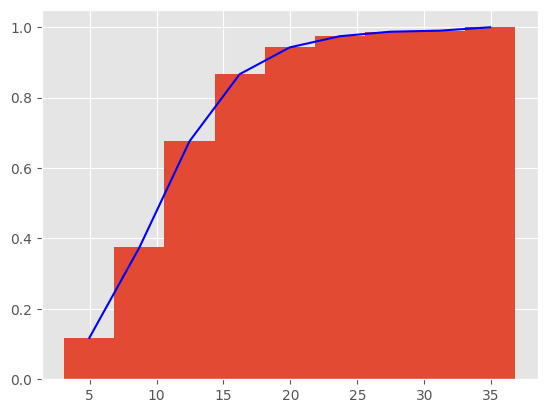

In [979]:
freqC8RelSum = pd.cut(plC8, bins=k).value_counts(sort=False, normalize = True).values.cumsum()
plt.bar(ar, freqC8RelSum, h)
plt.plot(ar, freqC8RelSum, color="blue")

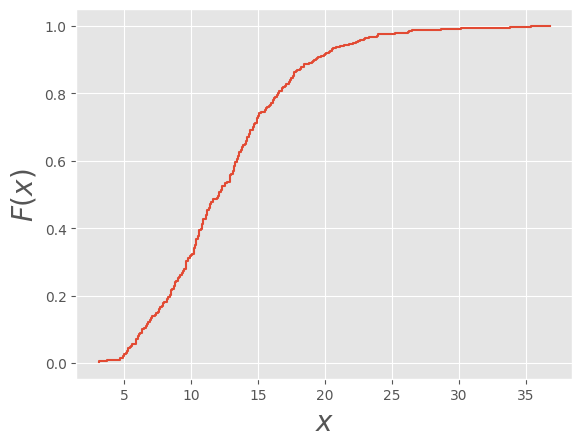

In [980]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(plC8)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

In [981]:
# БДЗ 2.X

In [982]:
n = 315
m = plC8.mean()
s = plC8.std()

In [983]:
q1 = 0.01
q2 = 0.05
q3 = 0.1

In [984]:
Td = stats.t(n-1)

a1 = m - (s * Td.ppf(1 - q1 / 2)) / n**(1/2)
b1 = m + (s * Td.ppf(1 - q1 / 2)) / n**(1/2)

a2 = m - (s * Td.ppf(1 - q2 / 2)) / n**(1/2)
b2 = m + (s * Td.ppf(1 - q2 / 2)) / n**(1/2)

a3 = m - (s * Td.ppf(1 - q3 / 2)) / n**(1/2)
b3 = m + (s * Td.ppf(1 - q3 / 2)) / n**(1/2)

print(a1, b1)
print(a2, b2)
print(a3, b3)


12.01026297435585 13.566879882787006
12.197672933255406 13.37946992388745
12.293123436292687 13.28401942085017


In [985]:
ch2 = stats.chi2(n-1)

a1 = ((n-1) * (s**2)) / ch2.ppf(1 - q1 / 2)
b1 = ((n-1) * (s**2)) / ch2.ppf(q1 / 2)

a2 = ((n-1) * (s**2)) / ch2.ppf(1 - q2 / 2)
b2 = ((n-1) * (s**2)) / ch2.ppf(q2 / 2)

a3 = ((n-1) * (s**2)) / ch2.ppf(1 - q3 / 2)
b3 = ((n-1) * (s**2)) / ch2.ppf(q3 / 2)

print(a1, b1)
print(a2, b2)
print(a3, b3)

23.335174114166144 35.23205799308637
24.442368880533873 33.436639143683166
25.0362245932926 32.564712820101015


In [986]:
plC11 = plasmaPage.C11
plC12 = plasmaPage.C12

In [987]:
m11 = plC11.mean()
m12 = plC12.mean()

s11 = plC11.std()
s12 = plC12.std()


In [988]:
s = (((n - 1)*(s11**2) + (n - 1)*(s12**2))/(n + n - 2))**(1/2)
t_pold = stats.t(n + n - 2)
a1 = (m11 - m12) - t_pold.ppf(1 - q1 / 2) * s * (((1/n) + (1/n))**(1/2))
b1 = (m11 - m12) + t_pold.ppf(1 - q1 / 2) * s * (((1/n) + (1/n))**(1/2))

a2 = (m11 - m12) - t_pold.ppf(1 - q2 / 2) * s * (((1/n) + (1/n))**(1/2))
b2 = (m11 - m12) + t_pold.ppf(1 - q2 / 2) * s * (((1/n) + (1/n))**(1/2))

a3 = (m11 - m12) - t_pold.ppf(1 - q3 / 2) * s * (((1/n) + (1/n))**(1/2))
b3 = (m11 - m12) + t_pold.ppf(1 - q3 / 2) * s * (((1/n) + (1/n))**(1/2))

print(a1, b1)
print(a2, b2)
print(a3, b3)
m11 - m12

1121.8156646706677 1583.9621131071096
1177.2597016430059 1528.5180761347715
1205.56296603485 1500.2148117429274


1352.8888888888887

In [989]:
f_pold = stats.f(n - 1, n - 1)

a1 = ((s11**2) * f_pold.ppf(q1 / 2))/ (s12**2)
b1 = ((s11**2) * f_pold.ppf(1 - q1 / 2))/ (s12**2)

a2 = ((s11**2) * f_pold.ppf(q2 / 2))/ (s12**2)
b2 = ((s11**2) * f_pold.ppf(1 - q2 / 2))/ (s12**2)

a3 = ((s11**2) * f_pold.ppf(q3 / 2))/ (s12**2)
b3 = ((s11**2) * f_pold.ppf(1 - q3 / 2))/ (s12**2)

print(a1, b1)
print(a2, b2)
print(a3, b3)

4.673990312398299 8.372496671389161
5.012156001879106 7.807611797794924
5.194250362736095 7.53390106364578


In [990]:
# БДЗ 3.X

In [991]:
plC8.mean()
print(stats.ttest_1samp(plC8, plC8.mean()))
print(stats.ttest_1samp(plC8, 13))
print(stats.ttest_1samp(plC8, 14))

TtestResult(statistic=0.0, pvalue=1.0, df=314)
TtestResult(statistic=-0.7040055141809971, pvalue=0.48195108875374726, df=314)
TtestResult(statistic=-4.03376132449652, pvalue=6.8983199597661e-05, df=314)


In [992]:
plC8.std()
sg0 = [plC8.std(), 5, 6]
for sg in sg0:
    z = ((n - 1) * plC8.var()) / (sg**2)
    pval = 2*min([stats.chi2.cdf(z, n - 1), 1 - stats.chi2.cdf(z, n - 1)])
    print(z, pval)

314.00000000000006 0.978773219481071
356.8415542857142 0.09615501345043964
247.80663492063488 0.004702759782587602


In [993]:
print(plC11.mean(), plC12.mean())
stats.ttest_ind(plC11, plC12)

2185.6031746031745 832.7142857142857


TtestResult(statistic=15.126948860992421, pvalue=2.623470248258301e-44, df=628.0)

In [994]:
z = plC11.var() / plC12.var()
print(z, 2*min([stats.f.cdf(z, n - 1 , n - 1), 1 - stats.f.cdf(z, n - 1, n - 1)]))

6.255634926421135 2.220446049250313e-16


In [995]:
k = math.floor(1 + math.log(315, 2))
h = (plC8.max() - plC8.min()) / k

In [996]:
count,division = np.histogram(plC8, bins=k)
p_4b = []
for i in range(1, len(division)):
    p_4b.append(stats.norm(loc=plC8.mean(), scale=plC8.std()).cdf(division[i]) - stats.norm(loc=plC8.mean(), scale=plC8.std()).cdf(division[i-1]))

p_4b

[0.09782981695631615,
 0.20753272477969775,
 0.2741012986175778,
 0.22545642414042477,
 0.11546706228302195,
 0.03679786871105717,
 0.007289841200113556,
 0.0008965713657705932,
 6.835801635973748e-05]

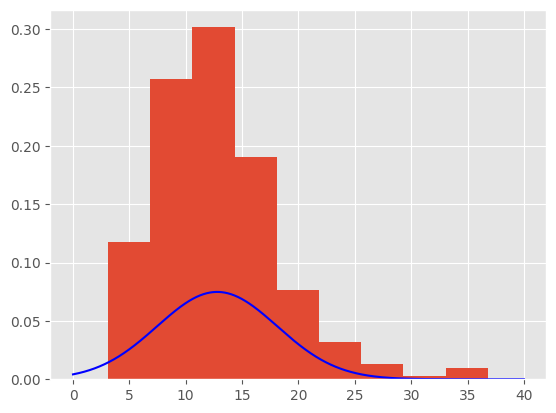

In [997]:
count,division = np.histogram(plC8, bins=k)
ar = []
for i in range(len(division)-1):
  ar.append(((division[i + 1] - division[i]) / 2) + division[i])

freqC8Rel = pd.cut(plC8, bins=k).value_counts(sort=False, normalize = True).values
plt.bar(ar, freqC8Rel, width = h)

x = np.linspace(0, 40, 10000)
pdf = stats.norm(loc=plC8.mean(), scale=plC8.std()).pdf(x)
plt.plot(x, pdf, color="blue")


In [998]:
freqC8 = pd.cut(plC8, bins=k).value_counts(sort=False).values
print(freqC8)
print(p_4b)
for i in range(0, len(p_4b)):
    print(n * p_4b[i])

[37 81 95 60 24 10  4  1  3]
[0.09782981695631615, 0.20753272477969775, 0.2741012986175778, 0.22545642414042477, 0.11546706228302195, 0.03679786871105717, 0.007289841200113556, 0.0008965713657705932, 6.835801635973748e-05]
30.816392341239588
65.37280830560479
86.341909064537
71.0187736042338
36.37212461915191
11.591328643983008
2.29629997803577
0.28241998021773684
0.021532775153317307


In [999]:
fix_p_4b = []
fix_freqC8 = []
flagOk = True
for i in range(0, len(p_4b)):
    if (flagOk and n * p_4b[i] > 5):
        fix_p_4b.append(p_4b[i])
        fix_freqC8.append(freqC8[i])
    else:
        if (flagOk):
            fix_p_4b.append(p_4b[i])
            fix_freqC8.append(freqC8[i])
            flagOk = False
        else:
            fix_p_4b[len(fix_p_4b) - 1] += p_4b[i]
            fix_freqC8[len(fix_freqC8) - 1] += freqC8[i]
            if (n * fix_p_4b[-1] > 5):
                flagOk = True
if (fix_p_4b[-1] * n < 5):
    fix_p_4b[-2] += fix_p_4b[-1]
    fix_freqC8[-2] += fix_freqC8[-2]
    fix_p_4b.pop()
    fix_freqC8.pop()
    

In [1000]:
print(p_4b, freqC8)
print(fix_p_4b, fix_freqC8)

[0.09782981695631615, 0.20753272477969775, 0.2741012986175778, 0.22545642414042477, 0.11546706228302195, 0.03679786871105717, 0.007289841200113556, 0.0008965713657705932, 6.835801635973748e-05] [37 81 95 60 24 10  4  1  3]
[0.09782981695631615, 0.20753272477969775, 0.2741012986175778, 0.22545642414042477, 0.11546706228302195, 0.045052639293301056] [37, 81, 95, 60, 24, 20]


In [1001]:
z = 0
for i in range(0,len(fix_freqC8)):
  z += ((fix_freqC8[i] - n*fix_p_4b[i])**2) / (n*fix_p_4b[i])


r = 2 # N(asd. askdm)

f_z_chi = stats.chi2(k - r - 1).cdf(z)
p_value = 1 - f_z_chi

z, p_value

(14.139973198393426, 0.028111074420680282)

In [1002]:
stats.jarque_bera(plC8)

SignificanceResult(statistic=146.32345934833677, pvalue=1.6836992405832223e-32)

In [1003]:
# БДЗ 5.X

In [1004]:
stats.wilcoxon(plC11, plC12)

WilcoxonResult(statistic=2424.0, pvalue=7.896088644123942e-44)

In [1005]:
k = math.floor(1 + math.log(315, 2))
h = round((max(plC11.max(), plC12.max()) - min(plC11.min(), plC11.min())) / k)
k, h

(9, 1048)

In [1006]:
lmin = min(plC11.min(), plC12.min())
borders = []
ar = []
for i in range(0, 9):
    borders.append(lmin + i * h)
    print(lmin + i * h, lmin + (i + 1) * h)
    ar.append((lmin + i * h + lmin + (i + 1) * h) / 2)
borders.append(9462)
print(ar, borders)

30 1078
1078 2126
2126 3174
3174 4222
4222 5270
5270 6318
6318 7366
7366 8414
8414 9462
[554.0, 1602.0, 2650.0, 3698.0, 4746.0, 5794.0, 6842.0, 7890.0, 8938.0] [30, 1078, 2126, 3174, 4222, 5270, 6318, 7366, 8414, 9462]


In [1007]:
pd.cut(plC11, bins=borders).value_counts(sort=False).values

array([ 73, 111,  69,  32,  15,   7,   6,   1,   0])

In [1008]:
pd.cut(plC12, bins=borders).value_counts(sort=False).values

array([244,  64,   4,   1,   0,   0,   1,   0,   0])

In [1009]:
freqC11_5 = pd.cut(plC11, bins=borders).value_counts(sort=False, normalize=True).values
freqC11_5

array([0.23248408, 0.35350318, 0.21974522, 0.10191083, 0.0477707 ,
       0.02229299, 0.01910828, 0.00318471, 0.        ])

In [1010]:
freqC12_5 = pd.cut(plC12, bins=borders).value_counts(sort=False, normalize=True).values
freqC12_5

array([0.77707006, 0.20382166, 0.01273885, 0.00318471, 0.        ,
       0.        , 0.00318471, 0.        , 0.        ])

<BarContainer object of 9 artists>

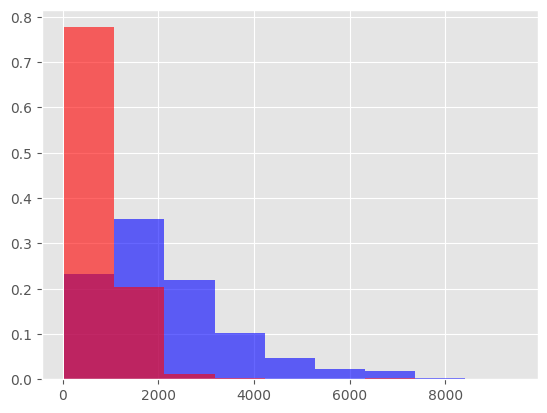

In [1011]:
plt.bar(ar, freqC11_5, width = h, color="blue", alpha=0.6)
plt.bar(ar, freqC12_5, width = h, color="red", alpha=0.6)
# plt.plot(ar, freqC8Rel, color="blue")

In [1012]:
stats.chi2_contingency([[73, 111,  130], [244,  64,   6]])

Chi2ContingencyResult(statistic=217.9245828804708, pvalue=4.767361577582013e-48, dof=2, expected_freq=array([[158.5,  87.5,  68. ],
       [158.5,  87.5,  68. ]]))

In [1013]:
# БДЗ 6.XXX

In [1014]:
plC2 = plasmaPage.C2
plC5 = plasmaPage.C5

pd.crosstab(plC2, plC5)

C5,No,Not often,Often
C2,,,
Female,87,77,109
Male,24,5,13


In [1015]:
stats.chi2_contingency(pd.crosstab(plC2, plC5))

Chi2ContingencyResult(statistic=11.070979092770376, pvalue=0.003944277256603155, dof=2, expected_freq=array([[ 96.2       ,  71.06666667, 105.73333333],
       [ 14.8       ,  10.93333333,  16.26666667]]))

In [1016]:
# БДЗ 7.X

In [1017]:
plC3 = plasmaPage.C3
plC14 = plasmaPage.C14
dict = {'Former': [], 'Never': [], 'Current Smoker': []}
for i in range(len(plC3)):
    if plC3[i] == 'Former':
        dict["Former"].append(plC14[i])
    elif plC3[i] == 'Never':
        dict["Never"].append(plC14[i])
    elif plC3[i] == 'Current Smoker':
        dict["Current Smoker"].append(plC14[i])

In [1018]:
for key in dict:
    print(key, len(dict[key]), np.asarray(dict[key]).mean(), np.asarray(dict[key]).var())

Former 115 644.2434782608696 52973.78419659736
Never 157 583.3057324840764 34985.66448943162
Current Smoker 43 563.0697674418604 41681.9718766901


In [1019]:
D_b = 0
for key in dict:
    D_b += len(dict[key]) * (np.asarray(dict[key]).mean() - plC14.mean())**2
D_b = D_b / n
print(D_b, (n/2)*D_b)

1031.932931052181 162529.4366407185


In [1020]:
D_w = 0
for key in dict:
    D_w += len(dict[key]) * (np.asarray(dict[key]).var(ddof=0))
D_w = D_w / n
print(D_w, (n / (n - 3)) * D_w)

42466.85491475281 42875.19005816389


In [1021]:
D_x = 0
for key in dict:
    for i in range(0, len(dict[key])):
        D_x += (dict[key][i] - plC14.mean())**2
D_x = D_x / n
print(D_x, (n / (n - 1)) * D_x)

43498.78784580499 43637.31901728845


In [1022]:
D_b + D_w

43498.78784580499

In [1023]:
D_b / D_x

0.023723257179261843

In [1024]:
math.sqrt(D_b / D_x)

0.15402356046807203

In [1025]:
stats.f_oneway(dict['Former'], dict['Never'], dict['Current Smoker'])

F_onewayResult(statistic=3.7907572286031472, pvalue=0.02362540112051114)

In [1026]:
# БДЗ 8.XXX

In [1027]:
k_xy = 0
for i in range(0, len(plC11)):
    k_xy += (plC11[i] - plC11.mean()) * (plC12[i] - plC12.mean())
k_xy = k_xy / n

q_xy = k_xy / (plC11.std() * plC12.std())
q_xy

0.052699072062411145

In [1032]:
numenator = 0
for i in range(0, len(plC11)):
    numenator += (plC11.rank()[i] - plC11.rank().mean())*(plC12.rank()[i] - plC12.rank().mean())

d1 = 0
for i in range (0, len(plC11)):
    d1 += (plC11.rank()[i] - plC11.rank().mean())**2

d2 = 0
for i in range (0, len(plC12)):
    d2 += (plC12.rank()[i] - plC12.rank().mean())**2

denominator = math.sqrt(d1 * d2)

rank_kor = numenator / denominator
rank_kor

0.1962857839707222

In [1033]:
stats.kendalltau(plC11, plC12)

SignificanceResult(statistic=0.1328626107882256, pvalue=0.0004387531397532802)

In [1042]:
norm_rv = stats.norm(loc=0, scale=1)

qu = [0.01, 0.05, 0.1]
for i in range(0, 3):
    print(q_xy + (q_xy * (1 - (q_xy**2)))/(2 * n) - norm_rv.ppf(1 - qu[i]/2) * (1 - (q_xy**2))/(math.sqrt(n)), q_xy + (q_xy * (1 - (q_xy**2)))/(2 * n) + norm_rv.ppf(1 - qu[i]/2) * (1 - (q_xy**2))/(math.sqrt(n)))
    
    

-0.09194599243755694 0.19751097058336567
-0.057342281581289775 0.16290725972709852
-0.039637131826536956 0.14520210997234567


In [1044]:
z = (q_xy * math.sqrt(n - 2))/(math.sqrt(1 - (q_xy**2)))
f_z = stats.t(n - 2).cdf(z)

pval = 2 * min(f_z, 1 - f_z)
z, pval

(0.9336391089877951, 0.35120975360347906)

In [1045]:
z = (rank_kor * math.sqrt(n - 2))/(math.sqrt(1 - (rank_kor**2)))
f_z = stats.t(n - 2).cdf(z)

pval = 2 * min(f_z, 1 - f_z)
z, pval

(3.541544634764964, 0.0004582828568191477)

In [1052]:
z = stats.kendalltau(plC11, plC12)[0] * ((9*n*(n+1))/(2*(2*n+5)))**(1/2)
f_z = stats.norm(loc = 0, scale = 1).cdf(z)
pval = 2 * min(f_z, 1 - f_z)

z, pval

(3.5287508408869828, 0.00041752603824707357)

In [1053]:
print(stats.kendalltau(plC8, plC8)[0], stats.kendalltau(plC8, plC10)[0], stats.kendalltau(plC8, plC13)[0])
print(stats.kendalltau(plC10, plC8)[0], stats.kendalltau(plC10, plC10)[0], stats.kendalltau(plC10, plC13)[0])
print(stats.kendalltau(plC13, plC8)[0], stats.kendalltau(plC13, plC10)[0], stats.kendalltau(plC13, plC13)[0])

1.0 0.1486310252756539 0.12821462209179296
0.1486310252756539 1.0 -0.0926465210766723
0.12821462209179296 -0.0926465210766723 1.0


In [1056]:
print(stats.kendalltau(plC8, plC8)[1], stats.kendalltau(plC8, plC10)[1], stats.kendalltau(plC8, plC13)[1])
print(stats.kendalltau(plC10, plC8)[1], stats.kendalltau(plC10, plC10)[1], stats.kendalltau(plC10, plC13)[1])
print(stats.kendalltau(plC13, plC8)[1], stats.kendalltau(plC13, plC10)[1], stats.kendalltau(plC13, plC13)[1])

1.0680377016398857e-152 8.737266513108192e-05 0.0007265007258609368
8.737266513108192e-05 2.181639787879798e-154 0.014336459244298085
0.0007265007258609368 0.014336459244298085 1.6828915378638789e-153


In [1057]:
r = [plC8.rank(), plC10.rank(), plC13.rank()]
k = 3 

w = 0
for i in range(0, n):
  tmp = 0
  for j in range(0, k):
    tmp += r[j][i]
  w += ((1/k) * tmp - (n+1)/2)**2

w = (w * 12) / (n**3 - n)
w

0.3937182376511575

In [1058]:
#статистика критерия

z = k * (n - 1) * w
f_z = stats.chi2(n-1).cdf(z)
pval = 2 * min(f_z, 1 - f_z)

z, pval

(370.88257986739035, 0.029863016770192097)

In [ ]:
#БДЗ 9.XXX

In [1059]:
plC6 = plasmaPage.C6

k_xy = 0
for i in range(0, len(plC6)):
    k_xy += (plC6[i] - plC6.mean()) * (plC14[i] - plC14.mean())
k_xy = k_xy / n

q_xy = k_xy / (plC6.std() * plC14.std())
q_xy

-0.0730958157990138

In [1060]:
b0 = plC14.mean() - q_xy * (plC14.std(ddof=0))/(plC6.std(ddof=0)) * plC6.mean()
b0

643.1137133917363

In [1061]:
b1 = q_xy * (plC14.std(ddof=0))/(plC6.std(ddof=0))
b1

-0.02244351091746342

In [1077]:
k = math.floor(1 + math.log(315, 2))


# yIntMean = 

# D_yx = 0
# for i in range(0, len(plC14)):


TypeError: 'Categorical' with dtype category does not support reduction 'mean'